# Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We will use the iris dataset this time: https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv. Load it as a dataframe in _df_ variable.

In [2]:
df = 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Check how many unique species we have.

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Save the species column to _y_ variable and remove it from the _df_.

In [4]:
y = 
...
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Data Preparation

In [5]:
def norm_minmax(x):
    return(np.subtract(x, min(x)) / (max(x) - min(x)))

Normalize all features except diagnosis with the min-max normalization function.

In [6]:
dfn = 
dfn.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


# K-Means

In [7]:
from sklearn.cluster import KMeans

k-means doesn't find the number of clusters for you, you need to supply the algorithm with the number you want. This makes the algorithm a bit tricky to tune. A way to find the optimal number of clusters is by using the "Elbow" method. In the elbow method, the within cluster sum of squares (squared distance to nearest center) is calculated for a range of values for k. k-means is not deterministic, it is a good idea to run the algorithm with a k-value multiple times, and take the average of the within cluster sum of squares.

In [8]:
inertia = []
K = range(1,16)
for k in K:
    m_km = 
    inertia.append(...)

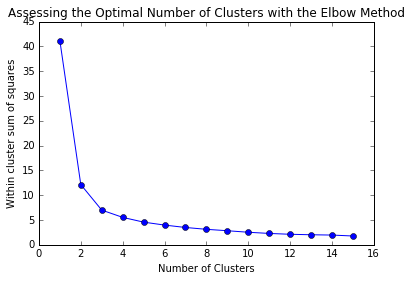

In [9]:
plt.plot(K, inertia, 'bo-')
plt.title('Assessing the Optimal Number of Clusters with the Elbow Method')
plt.ylabel('Within cluster sum of squares')
plt.xlabel('Number of Clusters');

Last big drop at 3-4, so we pick 4. Note that this isn't an exact method.

In [10]:
m_km = 
m_km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2017, tol=0.0001, verbose=0)

Plot the clusters in the sepal_length and sepal_width dimensions.

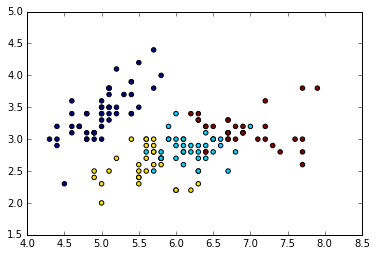

In [11]:
plt.scatter(...);

Plot the clusters in the petal_length and petal_width dimensions.

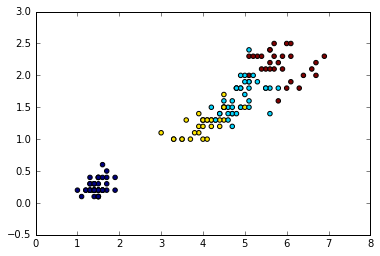

In [12]:
plt.scatter(...);

# Gaussian Mixture Model

In [13]:
from sklearn.mixture import GaussianMixture

k-means is a distance based clustering technique. Expectation Maximization clustering uses a different approach: distribution based clustering, in this case gaussian distributions.

Here we also need to select the amount of clusters. For this we use the Bayesian Information Criterion (BIC). Plot the BIC in function of the number of clusters. Note that in this case - using full covariance matrix - the normalization should not make any difference.

In [14]:
bic = []
K = range(1,16)
for k in K:
    m_km = 
    bic.append(...)

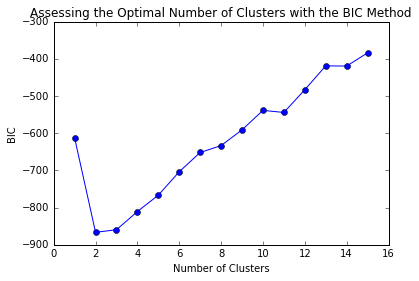

We take the lowest value, 2, although there is not much difference with 3, the true value.

# DBSCAN

In [16]:
from sklearn.cluster import DBSCAN

Another approach is density based clustering. Perform dbscan on the normalized data, with max distance 0.25.

In [17]:
m_dbs =

Number of clusters (ignoring noise)

In [18]:
len(set(m_dbs.labels_)) - (1 if -1 in m_dbs.labels_ else 0)

2

For plotting, see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py).

# Hierarchical

In [19]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

One of the older methods is hierarchical clustering. The algorithm builds a dendogram which connects close items. The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. Apply hierarchical clustering with euclidean distance.

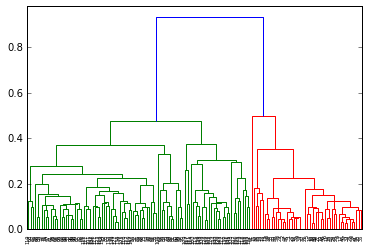

In [20]:
dendrogram(linkage(...));

If you want to plot a dendrogram with AgglomerativeClustering, see [here](https://raw.githubusercontent.com/scikit-learn/scikit-learn/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py).